# RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('data_ML.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR,ROCI_10,ROCI_20,ROCI_40,ROCI_60,ROCI_120,close_change
date,,,,,,,,,,,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044,1.411300,1.411300,1.411300,0.0,0.0,0.0,0.0,0.0,0.0,0
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281,1.413250,1.410650,1.411950,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492,1.419013,1.408520,1.413767,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943,1.425675,1.406675,1.416175,0.0,0.0,0.0,0.0,0.0,0.0,1
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094,1.426915,1.407685,1.417300,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
open,2048.0,1.224839,0.110876,1.038700,1.125185,1.222320,1.321508,1.482900
high,2048.0,1.229779,0.111035,1.041720,1.130540,1.227165,1.326790,1.493800
low,2048.0,1.219965,0.110473,1.033950,1.120327,1.216680,1.316502,1.480300
close,2048.0,1.224812,0.110868,1.038710,1.125290,1.221240,1.321623,1.482900
volume,2048.0,69968.092285,31029.993580,1.000000,50027.500000,66702.500000,85864.750000,251895.000000
bb_bbh,2048.0,1.247025,0.112603,1.059360,1.144809,1.242740,1.344603,1.500058
bb_bbl,2048.0,1.205254,0.110062,1.028955,1.106788,1.202059,1.301213,1.422685
bb_bbm,2048.0,1.226140,0.110884,1.047205,1.123544,1.225930,1.321040,1.457885
ATR,2048.0,0.009823,0.002995,0.000000,0.007888,0.009194,0.011114,0.018876
ROCI_10,2048.0,-0.099127,1.635318,-6.168910,-1.105194,-0.069678,0.938442,5.800075


## Preparing the data

In [4]:
column_indices = {name: i for i, name in enumerate(df.columns)}
column_indices

{'open': 0,
 'high': 1,
 'low': 2,
 'close': 3,
 'volume': 4,
 'bb_bbh': 5,
 'bb_bbl': 6,
 'bb_bbm': 7,
 'ATR': 8,
 'ROCI_10': 9,
 'ROCI_20': 10,
 'ROCI_40': 11,
 'ROCI_60': 12,
 'ROCI_120': 13,
 'close_change': 14}

In [5]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

normalizing

In [6]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

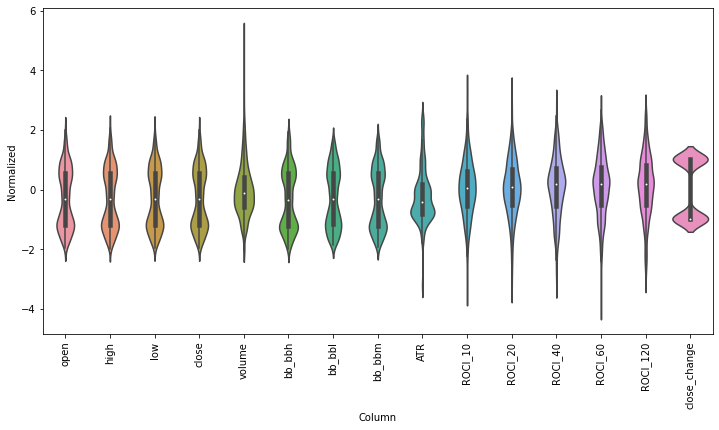

In [7]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Model

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()
